In [29]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [5]:
parasitized_data = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/')
print(parasitized_data[:10]) 
uninfected_data = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C175P136NThinF_IMG_20151127_142326_cell_236.png', 'C84P45ThinF_IMG_20150818_101146_cell_93.png', 'C170P131ThinF_IMG_20151119_120111_cell_237.png', 'C176P137NThinF_IMG_20151201_122444_cell_125.png', 'C99P60ThinF_IMG_20150918_141857_cell_15.png', 'C129P90ThinF_IMG_20151004_134944_cell_28.png', 'C68P29N_ThinF_IMG_20150819_134112_cell_138.png', 'C99P60ThinF_IMG_20150918_141129_cell_100.png', 'C97P58ThinF_IMG_20150917_145555_cell_168.png', 'C39P4thinF_original_IMG_20150622_111942_cell_8.png']


['C161P122ThinF_IMG_20151116_100840_cell_64.png', 'C69P30N_ThinF_IMG_20150819_140143_cell_16.png', 'C113P74ThinF_IMG_20150930_140646_cell_31.png', 'C150P111ThinF_IMG_20151115_115922_cell_109.png', 'C72P33_ThinF_IMG_20150815_105033_cell_101.png', 'C112P73ThinF_IMG_20150930_131900_cell_111.png', 'C182P143NThinF_IMG_20151201_171836_cell_79.png', 'C167P128ReThinF_IMG_20151201_105559_cell_43.png', 'C96P57ThinF_IMG_20150824_112442_cell_160.png', 'C96P57ThinF_IMG_20150824_105213_cell_180.png']


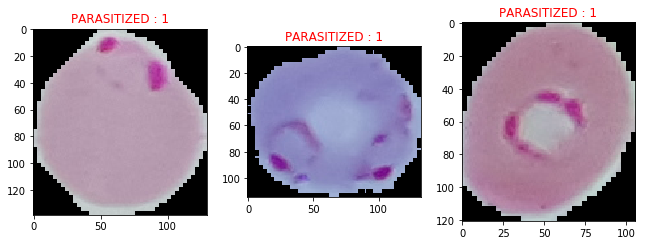

In [7]:
plt.figure(figsize = (12,12))
for i in range(3):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1',color='red')
    plt.tight_layout()
plt.show()

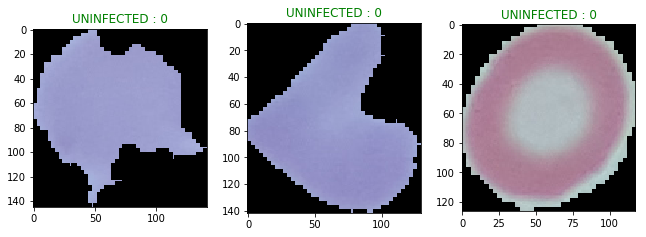

In [8]:
plt.figure(figsize = (12,12))
for i in range(3):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0', color='green')
    plt.tight_layout()
plt.show()

In [9]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../input/cell-images-for-detecting-malaria/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

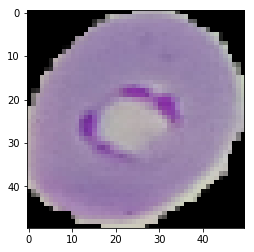

In [12]:
plt.imshow(data[2])


In [13]:
image_data = np.array(data)
labels = np.array(labels)

In [14]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 100)

In [17]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [18]:
print(f'TRAINING IMAGE DATA : {x_train.shape}')
print(f'TESTING IMAGE DATA : {x_test.shape}')
print(f'TRAINING LABELS : {y_train.shape}')
print(f'TESTING LABELS : {y_test.shape}')

TRAINING IMAGE DATA : (22046, 50, 50, 3)
TESTING IMAGE DATA : (5512, 50, 50, 3)
TRAINING LABELS : (22046, 2)
TESTING LABELS : (5512, 2)


In [19]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [20]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [22]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 32)        128       
__________

In [23]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [24]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 2, batch_size = 32)

Epoch 1/2
22046/22046 [==============================] - 11s 518us/step - loss: 0.5720 - acc: 0.7569
Epoch 2/2
22046/22046 [==============================] - 6s 276us/step - loss: 0.2242 - acc: 0.9162


In [25]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 1s 142us/step


In [26]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.16941696827141745
ACCURACY : 0.943033381712627


In [34]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models



In [38]:
test_model =tf.keras.models.load_model('..input/malaria/Malaria.h5')


OSError: Unable to open file (unable to open file: name = 'Malaria.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')